In [431]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [467]:
df = pd.read_csv('cleaned.csv')
df

,Unnamed: 0,company,Price,Ram,internal,is_expandable,expandable_upto,display_inch,is_retina_display,display_type,rear_camera,front_camera,Battery,Processor_type
0,0,apple,57999.0,4,128,0,256,6.10,1,XDR,12,12.0,3000,Bionic Chip
1,1,apple,58999.0,4,128,0,256,6.10,1,XDR,12,12.0,3000,Bionic Chip
2,4,apple,65999.0,4,128,0,256,6.70,1,XDR,12,12.0,3000,Bionic Chip
3,6,apple,64999.0,4,128,0,256,6.70,1,XDR,12,12.0,3000,Bionic Chip
4,7,apple,77900.0,4,128,0,256,6.10,1,XDR,48,12.0,3000,Bionic Chip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2571,vivo,13490.0,4,64,1,256,6.51,0,HD,13,8.0,5000,Mediatek
1468,2572,vivo,12890.0,4,64,1,256,6.22,0,HD,13,8.0,3260,Mediatek
1469,2573,vivo,8100.0,2,16,1,256,5.00,0,HD,8,5.0,2500,Qualcomm Sanpdragon
1470,2576,vivo,17990.0,4,64,1,256,6.35,0,HD,13,16.0,5000,Mediatek


In [468]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [469]:
df.shape

(1472, 13)

In [470]:
df.isna().sum()

company              0
Price                0
Ram                  0
internal             0
is_expandable        0
expandable_upto      0
display_inch         0
is_retina_display    0
display_type         0
rear_camera          0
front_camera         0
Battery              0
Processor_type       0
dtype: int64

In [471]:
df.duplicated().sum()

37

In [472]:
df.drop_duplicates(inplace=True)

In [473]:
df.duplicated().sum()

0

<Axes: xlabel='Price', ylabel='Count'>

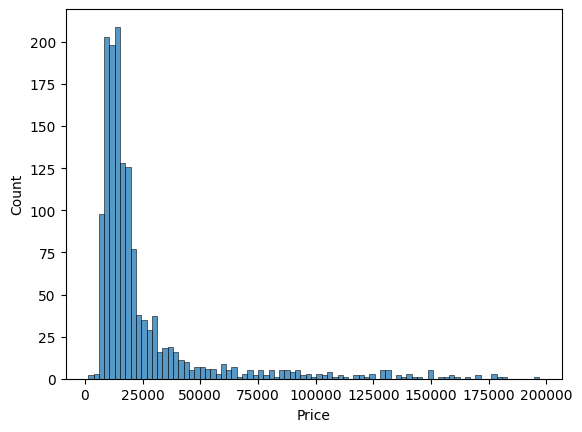

In [474]:
sns.histplot(df['Price'])
# price column is positivel skewed

In [475]:
df.head()

,company,Price,Ram,internal,is_expandable,expandable_upto,display_inch,is_retina_display,display_type,rear_camera,front_camera,Battery,Processor_type
0,apple,57999.0,4,128,0,256,6.1,1,XDR,12,12.0,3000,Bionic Chip
1,apple,58999.0,4,128,0,256,6.1,1,XDR,12,12.0,3000,Bionic Chip
2,apple,65999.0,4,128,0,256,6.7,1,XDR,12,12.0,3000,Bionic Chip
3,apple,64999.0,4,128,0,256,6.7,1,XDR,12,12.0,3000,Bionic Chip
4,apple,77900.0,4,128,0,256,6.1,1,XDR,48,12.0,3000,Bionic Chip


In [476]:
df[df['rear_camera'] == '13Mp']

,company,Price,Ram,internal,is_expandable,expandable_upto,display_inch,is_retina_display,display_type,rear_camera,front_camera,Battery,Processor_type
175,infinix,7499.0,4,64,1,256,6.82,0,HD,13Mp,8.0,6000,Mediatek


In [477]:
df.drop(index=[175],inplace=True)

In [478]:
df[df['rear_camera'] == 'Rear']

,company,Price,Ram,internal,is_expandable,expandable_upto,display_inch,is_retina_display,display_type,rear_camera,front_camera,Battery,Processor_type
385,oppo,19990.0,8,128,1,1024,6.72,0,HD,Rear,8.0,5000,Mediatek


In [479]:
df.drop(index=[385],inplace=True)

In [480]:
df['rear_camera'] = df['rear_camera'].astype('float')

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1433 entries, 0 to 1471
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1433 non-null   object 
 1   Price              1433 non-null   float64
 2   Ram                1433 non-null   int64  
 3   internal           1433 non-null   int64  
 4   is_expandable      1433 non-null   int64  
 5   expandable_upto    1433 non-null   int64  
 6   display_inch       1433 non-null   float64
 7   is_retina_display  1433 non-null   int64  
 8   display_type       1433 non-null   object 
 9   rear_camera        1433 non-null   float64
 10  front_camera       1433 non-null   float64
 11  Battery            1433 non-null   int64  
 12  Processor_type     1433 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 156.7+ KB


In [482]:
df[['Price','Ram','internal','is_expandable','expandable_upto','display_inch','is_retina_display','rear_camera','front_camera','Battery']].corr()['Price']

Price                1.000000
Ram                  0.192273
internal             0.567895
is_expandable       -0.420723
expandable_upto     -0.202387
display_inch        -0.115433
is_retina_display    0.674811
rear_camera          0.018769
front_camera         0.073892
Battery             -0.543770
Name: Price, dtype: float64

In [483]:
df['company'].value_counts()

company
realme      238
redmi       216
vivo        204
samsung     178
oppo        157
apple       140
infinix     108
poco         92
motorola     67
moto         17
google       12
razr          1
a             1
razar         1
a70           1
Name: count, dtype: int64

In [484]:
df['company'].replace('motorola','moto',inplace=True)

In [485]:
df[(df['company'] == 'a') | (df['company'] == 'razar') | (df['company'] == 'razr') | (df['company'] == 'a70')]

,company,Price,Ram,internal,is_expandable,expandable_upto,display_inch,is_retina_display,display_type,rear_camera,front_camera,Battery,Processor_type
317,razr,65160.0,8,256,0,256,6.9,0,HD,64.0,16.0,4200,other
318,a,1388.0,1,100,1,32,1.8,0,HD,0.1,16.0,800,other
319,razar,65160.0,8,256,0,256,6.9,0,HD,64.0,16.0,4200,other
362,a70,2099.0,4,4,0,256,2.4,0,HD,0.3,16.0,1750,other


In [486]:
df.drop(index=[317,318,319,362],inplace=True)

<Axes: xlabel='company'>

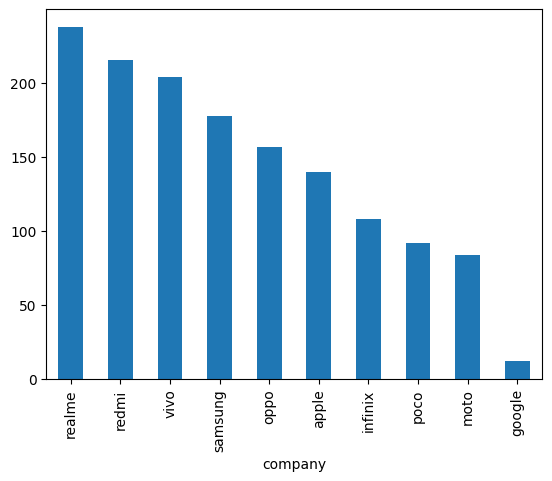

In [487]:
df['company'].value_counts().plot(kind='bar')

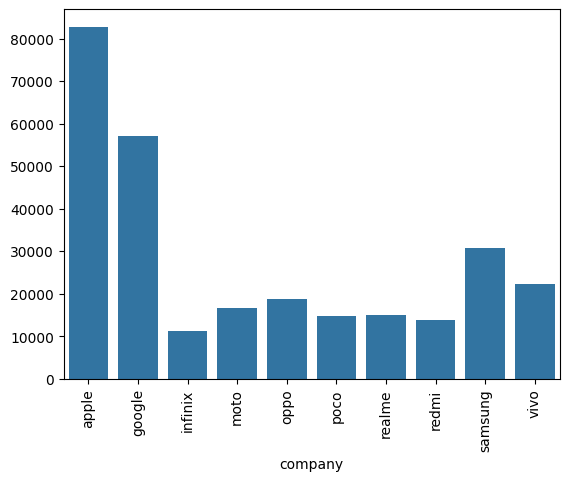

In [488]:
sns.barplot(x=df.groupby('company')['Price'].mean().index,
            y=df.groupby('company')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()
# average price of apple google and samsung is higher than the others it shows company name is plays cruicial role in price

<Axes: xlabel='Ram', ylabel='Price'>

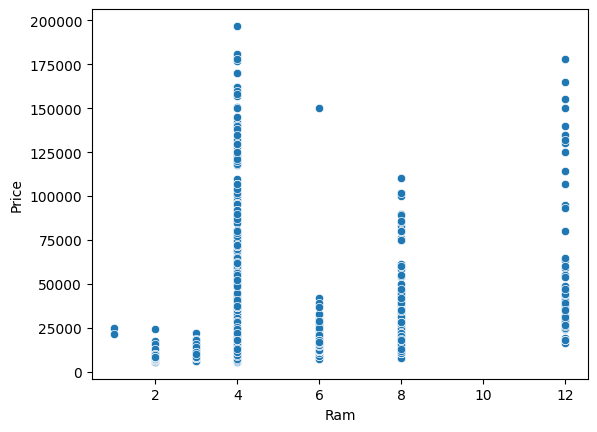

In [489]:
sns.scatterplot(data=df, x='Ram', y='Price')

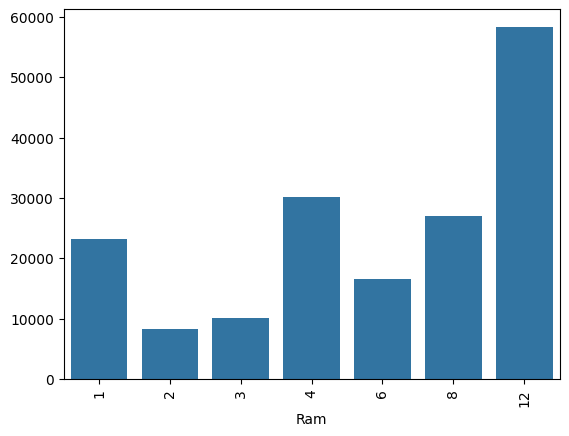

In [490]:
sns.barplot(x=df.groupby('Ram')['Price'].mean().index,
            y=df.groupby('Ram')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()
# the average price 12 gb ram are higher tha the others so we can conclude that ram effect the model

<Axes: xlabel='internal', ylabel='Price'>

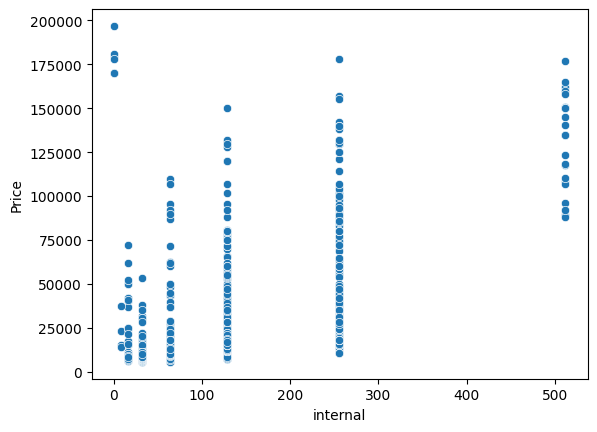

In [491]:
sns.scatterplot(data=df, x='internal', y='Price')

In [492]:
temp = df[df['internal'] == 1]
x = temp['internal'].replace(1,1024).values

In [493]:
df.loc[temp.index,temp.columns[3]] = x

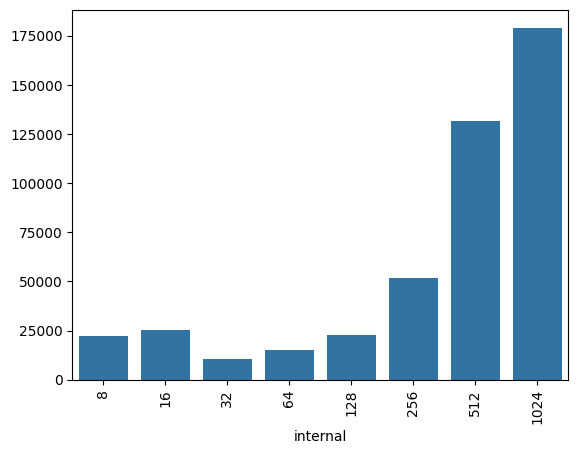

In [494]:
sns.barplot(x=df.groupby('internal')['Price'].mean().index,
            y=df.groupby('internal')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()
# as internal storage is increasing the avg price is also increasing

In [495]:
df['is_expandable'].value_counts()

is_expandable
1    786
0    643
Name: count, dtype: int64

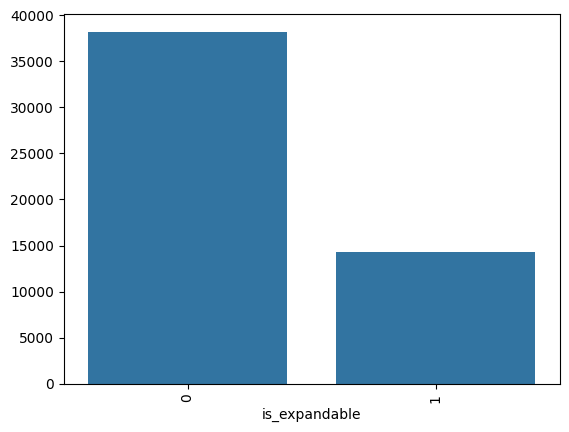

In [496]:
sns.barplot(x=df.groupby('is_expandable')['Price'].mean().index,
            y=df.groupby('is_expandable')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()
# if the phone has a expandable memory than the price are less compared to those phone who has not expandable memory

<Axes: xlabel='display_inch', ylabel='Price'>

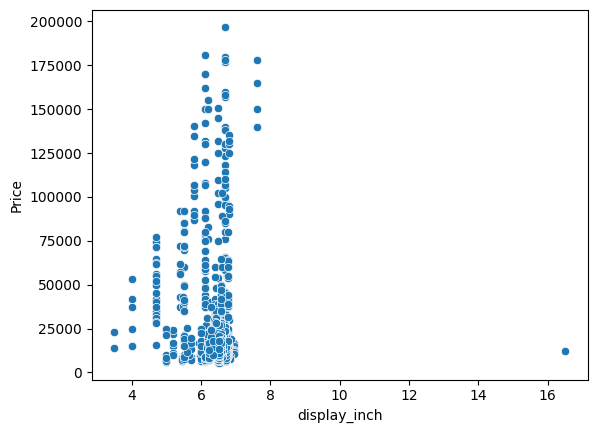

In [497]:
sns.scatterplot(data=df, x='display_inch',y='Price')

In [498]:
df = df[df['display_inch'] != 16.51]

In [499]:
df['is_retina_display'].value_counts()

is_retina_display
0    1296
1     132
Name: count, dtype: int64

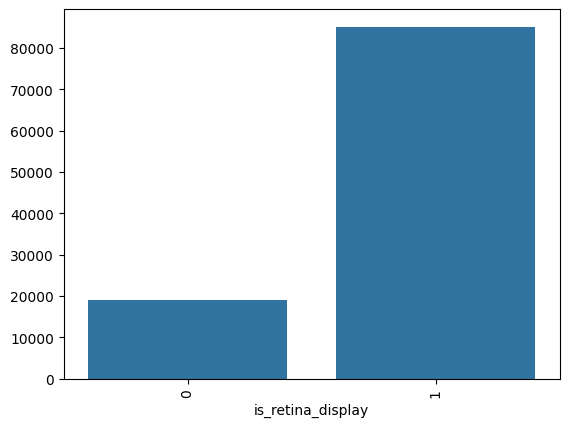

In [500]:
sns.barplot(x=df.groupby('is_retina_display')['Price'].mean().index,
            y=df.groupby('is_retina_display')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()
# retina display is very important while predicting the price

In [501]:
df['display_type'].value_counts()

display_type
HD     1360
XDR      68
Name: count, dtype: int64

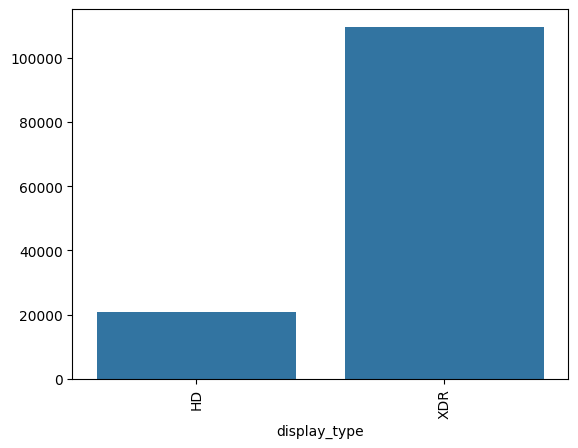

In [502]:
sns.barplot(x=df.groupby('display_type')['Price'].mean().index,
            y=df.groupby('display_type')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()
# XDR type of display has highers prices

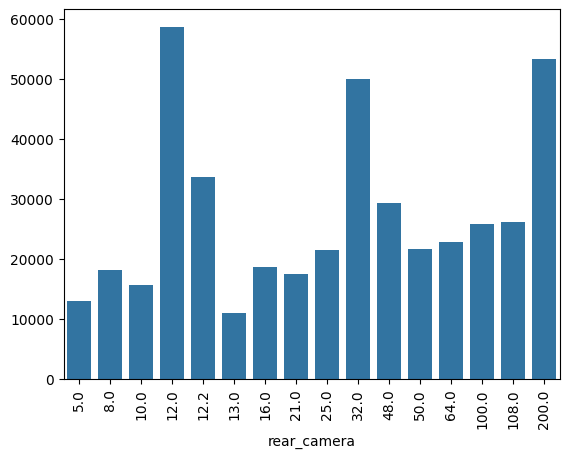

In [503]:
sns.barplot(x=df.groupby('rear_camera')['Price'].mean().index,
            y=df.groupby('rear_camera')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()

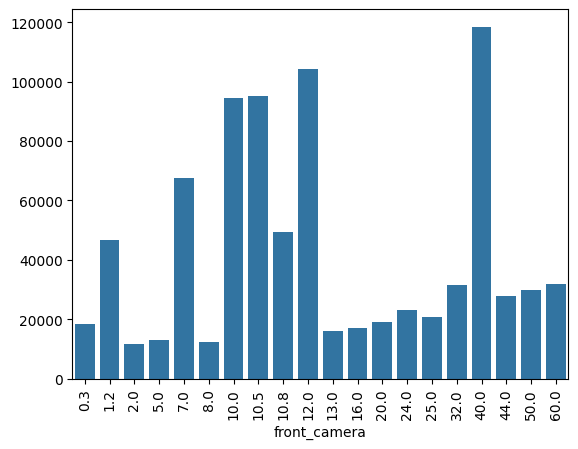

In [504]:
sns.barplot(x=df.groupby('front_camera')['Price'].mean().index,
            y=df.groupby('front_camera')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Battery', ylabel='Price'>

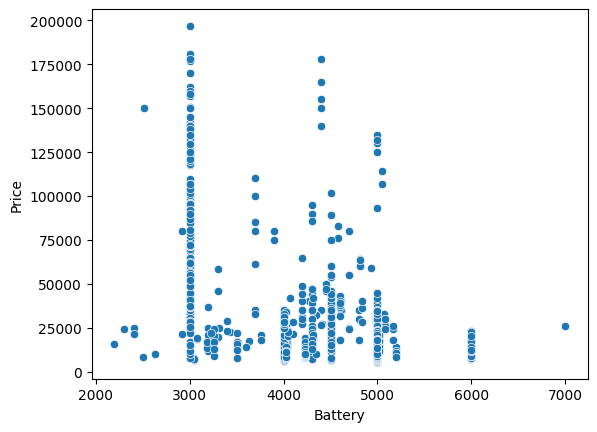

In [505]:
sns.scatterplot(data=df,x='Battery',y='Price')

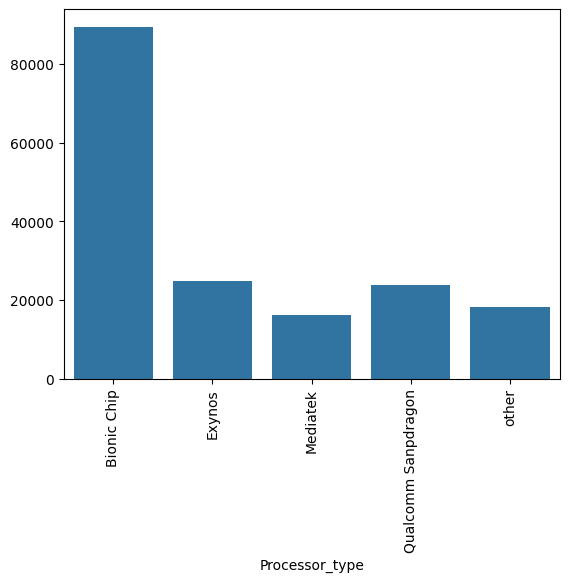

In [506]:
sns.barplot(x=df.groupby('Processor_type')['Price'].mean().index,
            y=df.groupby('Processor_type')['Price'].mean().values)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df1 = pd.read_csv("C:\\Users\\sanjay\\Documents\\All working files\\projects\\mobile price predictor\\all_phones_data.csv")
df1.head()

### Model Fitting

In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [89]:
df['company'].unique()

array(['apple', 'google', 'infinix', 'moto', 'oppo', 'poco', 'realme',
       'redmi', 'samsung', 'vivo'], dtype=object)

In [507]:
df['Price'] = np.log(df['Price'])

C:\Users\sanjay\AppData\Local\Temp\ipykernel_1800\2380495851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = np.log(df['Price'])


In [280]:
X = df.drop(columns=['Price','expandable_upto','display_type'],axis=1)
y = df['Price']

<Axes: xlabel='Price', ylabel='Count'>

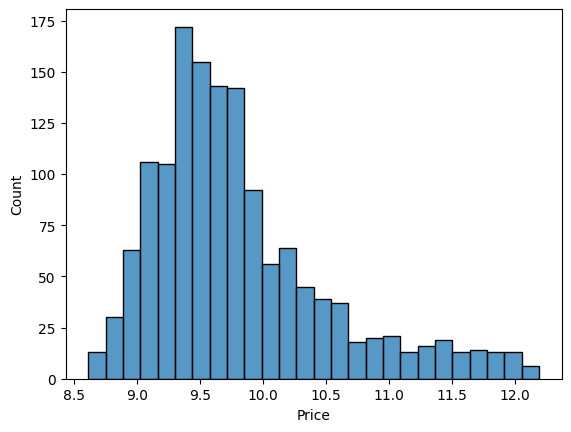

In [131]:
sns.histplot(np.log(y))

In [264]:
X.columns

Index(['company', 'Ram', 'internal', 'is_expandable', 'display_inch',
       'is_retina_display', 'display_type', 'rear_camera', 'front_camera',
       'Battery', 'Processor_type'],
      dtype='object')

In [281]:
y = np.log(y)

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [ ]:
df = df.iloc[X.index]

In [ ]:
X['color'] = df['model'].str.strip().str.split("(").str[1].str.split(',').str[0]

In [ ]:
def extract_color(name):
    if 'Blue' in name:
        return 'Blue'
    elif 'Starlight' in name:
        return 'Starlight'
    elif 'Midnight' in name:
        return 'Midnight'
    elif 'Purple' in name:
        return 'Purple'
    elif 'Black' in name:
        return 'Black'
    elif 'White' in name:
        return 'White'
    elif 'Gold' in name :
        return 'Gold'
    elif 'Silver' in name:
        return 'Silver'
    elif 'Yellow' in name:
        return 'Yellow'
    elif 'Grey' in name:
        return 'Grey'
    else:
        return 'other'

In [ ]:
X['color'].replace('','red',inplace=True)

In [ ]:
X['color'] = X['color'].fillna('Unknown').apply(extract_color)

In [415]:
X.head()

,company,Ram,internal,is_expandable,display_inch,is_retina_display,rear_camera,front_camera,Battery,Processor_type,color
0,apple,4,128,0,6.1,1,12.0,12.0,3000,Bionic Chip,Blue
1,apple,4,128,0,6.1,1,12.0,12.0,3000,Bionic Chip,Starlight
2,apple,4,128,0,6.7,1,12.0,12.0,3000,Bionic Chip,Midnight
3,apple,4,128,0,6.7,1,12.0,12.0,3000,Bionic Chip,Purple
4,apple,4,128,0,6.1,1,48.0,12.0,3000,Bionic Chip,Blue


In [465]:
step1 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False,drop='first'),[0,9,10])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


pipe.fit(X, y)
y_pred = pipe.predict(X)
print('R2 score', r2_score(y,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y,y_pred)))



R2 score 0.8598288569661319
RMSE 0.26478682321964286


In [60]:
df['Processor_type'].unique()

array(['Bionic Chip', 'other', 'Qualcomm Sanpdragon', 'Mediatek',
       'Exynos'], dtype=object)

In [68]:
df['company'].unique()

array(['apple', 'google', 'infinix', 'moto', 'oppo', 'poco', 'realme',
       'redmi', 'samsung', 'vivo'], dtype=object)

In [417]:
X['color'].unique()

array(['Blue', 'Starlight', 'Midnight', 'Purple', 'Black', 'other',
       'White', 'Yellow', 'Gold', 'Silver', 'Grey'], dtype=object)

In [462]:
X

,company,Ram,internal,is_expandable,display_inch,is_retina_display,rear_camera,front_camera,Battery,Processor_type,color
0,apple,4,128,0,6.10,1,12.0,12.0,3000,Bionic Chip,Blue
1,apple,4,128,0,6.10,1,12.0,12.0,3000,Bionic Chip,Starlight
2,apple,4,128,0,6.70,1,12.0,12.0,3000,Bionic Chip,Midnight
3,apple,4,128,0,6.70,1,12.0,12.0,3000,Bionic Chip,Purple
4,apple,4,128,0,6.10,1,48.0,12.0,3000,Bionic Chip,Blue
...,...,...,...,...,...,...,...,...,...,...,...
1467,vivo,4,64,1,6.51,0,13.0,8.0,5000,Mediatek,White
1468,vivo,4,64,1,6.22,0,13.0,8.0,3260,Mediatek,Blue
1469,vivo,2,16,1,5.00,0,8.0,5.0,2500,Qualcomm Sanpdragon,Black
1470,vivo,4,64,1,6.35,0,13.0,16.0,5000,Mediatek,Black


In [466]:
np.exp(pipe.predict([['realme',8,256,0,6.7,0,50,32,5000,'Qualcomm Sanpdragon','Blue']]))

c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([27550.52323916])

In [508]:
df['color'] = X['color']

C:\Users\sanjay\AppData\Local\Temp\ipykernel_1800\3861378567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = X['color']


In [509]:
df

,company,Price,Ram,internal,is_expandable,expandable_upto,display_inch,is_retina_display,display_type,rear_camera,front_camera,Battery,Processor_type,color
0,apple,10.968181,4,128,0,256,6.10,1,XDR,12.0,12.0,3000,Bionic Chip,Blue
1,apple,10.985276,4,128,0,256,6.10,1,XDR,12.0,12.0,3000,Bionic Chip,Starlight
2,apple,11.097395,4,128,0,256,6.70,1,XDR,12.0,12.0,3000,Bionic Chip,Midnight
3,apple,11.082127,4,128,0,256,6.70,1,XDR,12.0,12.0,3000,Bionic Chip,Purple
4,apple,11.263181,4,128,0,256,6.10,1,XDR,48.0,12.0,3000,Bionic Chip,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,vivo,9.509704,4,64,1,256,6.51,0,HD,13.0,8.0,5000,Mediatek,White
1468,vivo,9.464207,4,64,1,256,6.22,0,HD,13.0,8.0,3260,Mediatek,Blue
1469,vivo,8.999619,2,16,1,256,5.00,0,HD,8.0,5.0,2500,Qualcomm Sanpdragon,Black
1470,vivo,9.797571,4,64,1,256,6.35,0,HD,13.0,16.0,5000,Mediatek,Black


In [460]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))